# ML model error representation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r'data\df_2classes2.xlsx') 
df.head()

,Unnamed: 0,Sensor,Date,Index,Model,Accuracy,Water precision,Water f1-score,Water test pixels,Oil precision,Oil f1-score,Oil test pixels
0,0,AVIRIS,1,NDOI,KNN,0.999353,0.999267,0.999633,1363,1.0,0.997245,182
1,1,AVIRIS,1,NDOI,Decision tree,0.998706,0.998535,0.999267,1363,1.0,0.994475,182
2,2,AVIRIS,1,NDOI,Random Forest,0.998706,0.998535,0.999267,1363,1.0,0.994475,182
3,3,AVIRIS,1,NDOI,Ada Boost,0.998706,0.998535,0.999267,1363,1.0,0.994475,182
4,4,AVIRIS,1,RAI,KNN,0.999353,0.999267,0.999633,1363,1.0,0.997245,182


In [3]:
Av_1 = df[(df.Sensor == "AVIRIS") & (df.Date == 1)]; Av_2 = df[(df.Sensor == "AVIRIS") & (df.Date == 2)]
Hi_1 = df[(df.Sensor == "HICO") & (df.Date == 1)];   Hi_2 = df[(df.Sensor == "HICO") & (df.Date == 2)]
Me_1 = df[(df.Sensor == "MERIS") & (df.Date == 1)];  Me_2 = df[(df.Sensor == "MERIS") & (df.Date == 2)]

images = [Av_1, Av_2, Hi_1, Hi_2, Me_1, Me_2]
images_name = ["Av_1", "Av_2", "Hi_1", "Hi_2", "Me_1", "Me_2"]

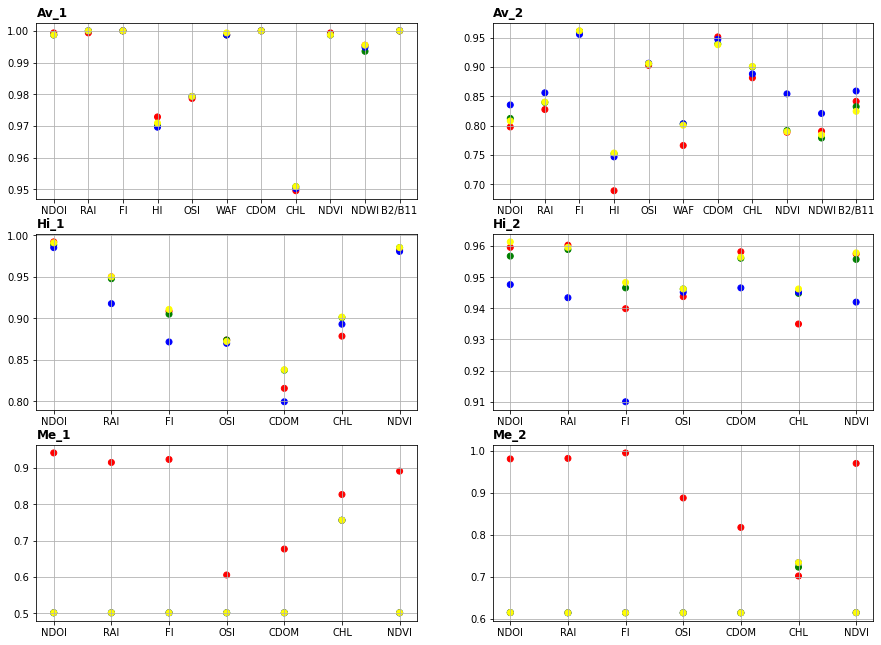

In [4]:
fig = plt.figure(figsize=(15,11))
col = {'KNN':'red', 'Decision tree':'green', 'Random Forest':'blue', 'Ada Boost':'yellow'}

for i in range(0,len(images)):
    ax = fig.add_subplot(3,2,i+1)
    title = images_name[i]
    plt.grid()
    plt.title(title, fontweight='bold', fontsize=12, loc='left')
    plt.scatter(images[i]['Index'].tolist(), images[i]['Accuracy'].tolist(), marker='o', color = images[i].Model.map(col))


In [5]:
#plt.plot(x_val, y_val, marker='o', linestyle='--')
#Av_1.plot.line(x = "Index", y = 'Accuracy', color = Av_1.Model.map(col))

Text(0.5, 1.0, 'Mean F1-score of the Oil class for each index')

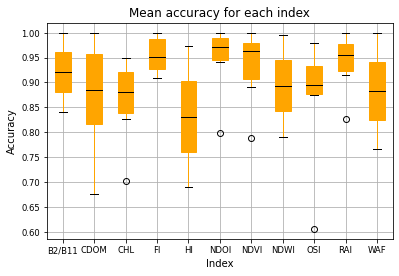

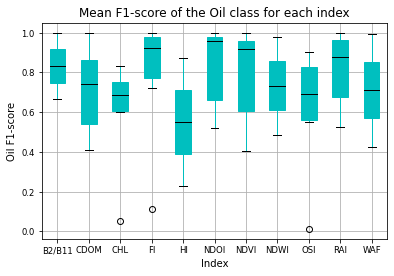

In [6]:
#df.boxplot(column="Accuracy", by="Model")
#df.boxplot(column="Oil f1-score", by="Model")

df[df.Model == "KNN"].boxplot(column="Accuracy", by="Index", patch_artist = True, fontsize=8.5, 
                              color = dict(boxes='orange', whiskers='orange', medians='black', caps='black'))
plt.ylabel("Accuracy"); plt.suptitle(''); plt.title('Mean accuracy for each index')
#plt.savefig("data/Index_BoxplotAccuracy.eps", bbox_inches='tight',pad_inches = 0)

df[df.Model == "KNN"].boxplot(column="Oil f1-score", by="Index", patch_artist = True,  fontsize=8.5, 
                              color = dict(boxes='c', whiskers='c', medians='black', caps='black'))
plt.ylabel("Oil F1-score"); plt.suptitle(''); plt.title('Mean F1-score of the Oil class for each index')
#plt.savefig("data/Index_BoxplotOilF1.eps", bbox_inches='tight',pad_inches = 0)

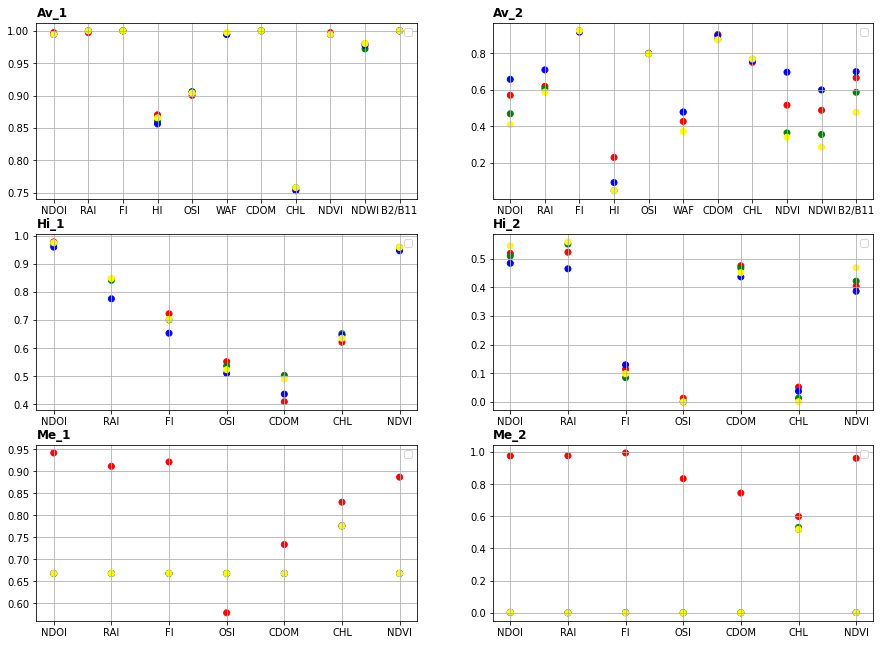

In [7]:
fig = plt.figure(figsize=(15,11))
col = {'KNN':'red', 'Decision tree':'green', 'Random Forest':'blue', 'Ada Boost':'yellow'}

for i in range(0,len(images)):
    ax = fig.add_subplot(3,2,i+1)
    title = images_name[i]
    plt.legend(col)
    plt.grid()
    plt.title(title, fontweight='bold', fontsize=12, loc='left')
    plt.scatter(images[i]['Index'].tolist(), images[i]['Oil f1-score'].tolist(), marker='o', color = images[i].Model.map(col))


Text(0.5, 1.0, 'Comparison of metrics for assessing the indexes')

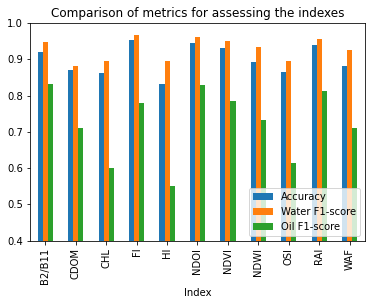

In [8]:
df[df.Model == "KNN"].groupby('Index').mean().plot.bar(y = ["Accuracy", "Water f1-score", "Oil f1-score"])
plt.ylim(0.4, 1)
plt.title("Index Accuracy for Hi_1 (KNN)")
plt.legend(["Accuracy", "Water F1-score", "Oil F1-score"], loc='lower right')
plt.suptitle(''); plt.title('Comparison of metrics for assessing the indexes')
#plt.savefig("data/Index_Metrics.eps", bbox_inches='tight',pad_inches = 0)

In [10]:
# Figure of merit
df[df.Model == 'KNN'].groupby('Index').mean()['Oil f1-score']*df[df.Model == 'KNN'].groupby('Index').mean()['Accuracy']/df[df.Model == 'KNN'].groupby('Index').mean()['Water f1-score']

Index
B2/B11    0.808459
CDOM      0.702406
CHL       0.578270
FI        0.768194
HI        0.510267
NDOI      0.816381
NDVI      0.770206
NDWI      0.702476
OSI       0.592951
RAI       0.797110
WAF       0.676770
dtype: float64

In [12]:
df[df.Model == 'KNN'].groupby('Index').quantile(0.75)['Accuracy'] - df[df.Model == 'KNN'].groupby('Index').quantile(0.25)['Accuracy']

C:\Users\ambar\AppData\Local\Temp/ipykernel_1092/3497285657.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  df[df.Model == 'KNN'].groupby('Index').quantile(0.75)['Accuracy'] - df[df.Model == 'KNN'].groupby('Index').quantile(0.25)['Accuracy']


Index
B2/B11    0.079283
CDOM      0.140479
CHL       0.082164
FI        0.059973
HI        0.141936
NDOI      0.043918
NDVI      0.071910
NDWI      0.102534
OSI       0.056246
RAI       0.053612
WAF       0.116303
Name: Accuracy, dtype: float64

In [11]:
df[df.Model == 'KNN'].groupby('Index').mean()

,Unnamed: 0,Date,Accuracy,Water precision,Water f1-score,Water test pixels,Oil precision,Oil f1-score,Oil test pixels
Index,,,,,,,,,
B2/B11,62.000000,1.5,0.920717,0.938815,0.948070,1296.500000,0.856749,0.832478,299.0
CDOM,112.666667,1.5,0.869893,0.902456,0.880531,1742.166667,0.763224,0.710996,678.5
CHL,116.666667,1.5,0.862070,0.881982,0.895558,1742.166667,0.662418,0.600733,678.5
FI,102.000000,1.5,0.954579,0.957415,0.968049,1742.166667,0.826486,0.779035,678.5
HI,34.000000,1.5,0.830879,0.863786,0.894995,1296.500000,0.649705,0.549643,299.0
NDOI,94.000000,1.5,0.945057,0.957231,0.960900,1742.166667,0.872553,0.830067,678.5
NDVI,120.666667,1.5,0.931431,0.933156,0.950311,1742.166667,0.883634,0.785818,678.5
NDWI,58.000000,1.5,0.892935,0.906733,0.932855,1296.500000,0.819066,0.733881,299.0
OSI,107.333333,1.5,0.865399,0.862194,0.894345,1742.166667,0.722373,0.612784,678.5


## Three classes

In [ ]:
df = pd.read_excel(r'data\df_3classes.xlsx') 
df.head()

In [ ]:
Av_1 = df[(df.Sensor == "AVIRIS") & (df.Date == 1)]; Av_2 = df[(df.Sensor == "AVIRIS") & (df.Date == 2)]
Hi_1 = df[(df.Sensor == "HICO") & (df.Date == 1)];   Hi_2 = df[(df.Sensor == "HICO") & (df.Date == 2)]
Me_1 = df[(df.Sensor == "MERIS") & (df.Date == 1)];  Me_2 = df[(df.Sensor == "MERIS") & (df.Date == 2)]

images = [Av_1, Av_2, Hi_1, Hi_2, Me_1, Me_2]
images_name = ["Av_1", "Av_2", "Hi_1", "Hi_2", "Me_1", "Me_2"]

In [ ]:
fig = plt.figure(figsize=(15,11))
col = {'KNN':'red', 'Decision tree':'green', 'Random Forest':'blue', 'Ada Boost':'yellow'}

for i in range(0,len(images)):
    ax = fig.add_subplot(3,2,i+1)
    title = images_name[i]
    plt.grid()
    plt.title(title, fontweight='bold', fontsize=12, loc='left')
    plt.scatter(images[i]['Index'].tolist(), images[i]['Accuracy'].tolist(), marker='o', color = images[i].Model.map(col))


In [ ]:
Av_1[Av_1.Model == "KNN"].plot.bar(x = "Index", y = ["Accuracy", "Water f1-score", "Thick f1-score", "Thin f1-score"])
plt.ylabel("Accuracy")
plt.ylim(0.2, 1)
plt.title("Index Accuracy for Av_1 (KNN)")
plt.legend(loc='lower right')

Av_1[Av_1.Model == "KNN"].plot.bar(x = "Index", y = "Accuracy")
plt.ylim(0.7, 1)
plt.ylabel("Accuracy")
plt.title("Index Accuracy for Av_1 (KNN)")


Av_1[Av_1.Model == "KNN"].plot.bar(x = "Index", y = "Thick f1-score", color = "green")
plt.ylim(0.7, 1)
plt.ylabel("Accuracy")
plt.title("Thick f1-score for Av_1 (KNN)")